# Lendo, Visualizando e Manipulando Imagens

## Objetivo

O objetivo deste notebook é demonstrar como carregar, visualizar e manipular imagens para deixá-las prontas 
para o uso pelas redes convolucionais.

Exemplificaremos as operações usando as duas bibliotecas mas comuns:

* Matplotlib
* PIL

## A biblioteca PIL

A biblioteca PIL, ou Python Image Processing traz para o Python a capacidade de processar imagens. A biblioteca suporta vários formatos de arquivo e poderosas ferramentas de processamento de imagem.

Alguns dos usos da biblioteca são Arquivamento, fazendo processamento em lote de imagens, Exibição, suportando várias interfaces (GUIs) e Processamento, como redimensionamento, rotação, histograma, dentre outras.

### Importando a biblioteca PIL

In [1]:
import numpy as np
from IPython.display import display
from PIL import Image

### Carregando uma imagem do disco

In [2]:
img = Image.open('../figures/Iris_versicolor.jpg')

### Estrutura de dados

In [3]:
type(img)
img.size, img.bits, img.format, img.mode

((220, 165), 8, 'JPEG', 'RGB')

### Mostrando uma imagem PIL

No jupyter-notebook, chamar o objeto que contém a imagem faz com que ela seja mostrada.

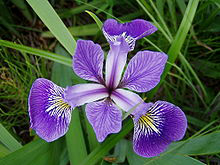

In [4]:
img

Ou também é possível usar o método `display` da classe `IPython.display`.

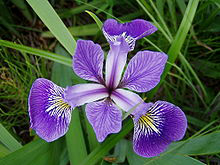

In [5]:
display(img)

### Dividindo os canais da imagem

Como a imagem anterior é colorida, ela contém os três canais (RGB - red, gree, blue). Com o método split é possível dividir os canais da imagens.

In [6]:
#Splitting the image into its respective bands, i.e. Red, Green,
#and Blue for RGB
r,g,b = img.split()

Canal Red:

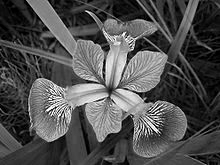

In [7]:
r

Canal Green:

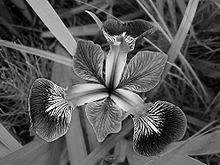

In [8]:
g

Canal Blue:

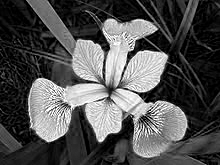

In [9]:
b

### Carregando a imagem com diferentes canais

Também é possível carregar a imagem somente com um canal, em escala de cinza, usando o método `convert` com o parâmetro `L`.

In [10]:
img1 = Image.open('../figures/Iris_versicolor.jpg').convert('L')

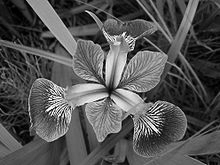

In [11]:
img1

### Salvando uma imagem em disco em formato diferente

Para salvar uma imagem em disco, usamos o método `save` passando como parâmetro o caminho para salvar a imagem. Caso seja necessário alterar o formato da imagem, é possível passar como parâmetro o formato desejado.

In [12]:
img1.save('../../Iris_versicolor_BW.png','png')

### Carregando a nova imagem salva em disco em escala de cinza

In [13]:
img2 = Image.open('../../Iris_versicolor_BW.png')

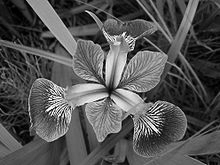

In [14]:
img2

### Transformando uma imagem em um array numpy

Para transformar a imagem em um array numpy, usamos o método `array` da classe numpy.

In [15]:
numpy_img = np.array(img)

### Mostrando as dimensões da imagem

Neste caso, a imagem possui 3 dimensões: a primeira é altura da imagem, a segundo é a largura da imagem e a terceira contém os canais R, G, B da imagem.

Existem duas formas principais de representar a imagem no array:
- channels first
- channels last

Neste caso, a imagem está representada no formato *channels last*

In [16]:
numpy_img.shape

(165, 220, 3)

Tensorflow, Theano e PyTorch podem diferir quanto a posição dos canais. Para isso podemos trocar as dimensões e passar a informação de canais para a primeira posição. Esta configuração é conhecida como channels-first.

In [17]:
numpy_img.transpose(2, 0, 1).shape

(3, 165, 220)

## A biblioteca Matplotlib

O Matplotlib é uma biblioteca para plotagem 2D. Com ela é possível plotar pontos, funções, estatísticas e imagens. 

### Importando a biblioteca

`Nota:` quando o Matplotlib é usando dentro do Jupyter-Notebook é necessário o uso do comando `%matplotlib inline` para que os gráficos sejam mostrados.

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt

### Mostrando uma imagem no Matplotlib

Note que para mostrar uma imagem com a biblioteca Matplotlib, esta já precisa estar carregada em um objeto.

A biblioteca Matplotlib consegue mostrar tanto imagens coloridas no formato PIL quando arrays NumPy no formato channels last.

### Mostrando uma imagem no formato array numpy:

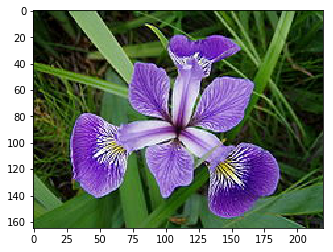

In [19]:
plt.imshow(numpy_img)

### Mostrando uma imagem no formato PIL:

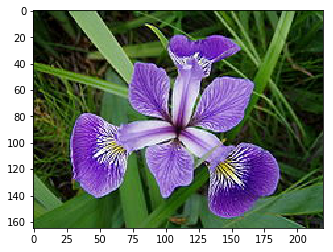

In [20]:
plt.imshow(img)

### Manipulando o plot

Por ser uma biblioteca de plotagem, é possível manipular várias informações do plot, como grid, título, label dos eixos, tamanho da figura, dentre outras.

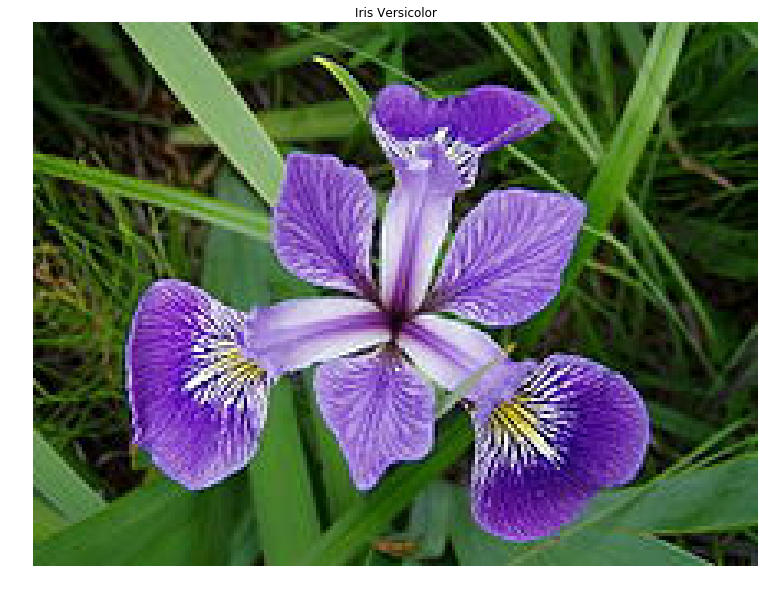

In [21]:
plt.figure(figsize=(15, 10))
plt.title("Iris Versicolor")
plt.imshow(numpy_img)
plt.axis('off')
plt.show()

### Mostrando imagens monocromáticas (1 canal) no Matplotlib

In [22]:
numpy_img2 = np.array(img2)

In [23]:
numpy_img2.shape

(165, 220)

Por padrão, o Matplotlib utiliza uma tabela de cor falsa (pseudo cor) quando visualiza uma imagem de um único canal. A função colorbar() mostra a tabela de cor utilizada:

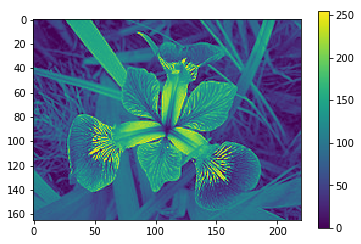

In [24]:
plt.imshow(numpy_img2)
plt.colorbar();

Para visualizar a imagem en tons de cinza, deve-se informar a tabela `gray`, no parâmetro `cmap` do `imshow`. 

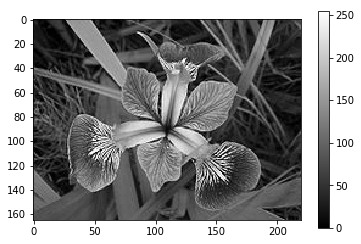

In [25]:
plt.imshow(numpy_img2, cmap='gray')
plt.colorbar()

## Leitura de imagens com Matplotlib

Existe um cuidado especial quando utilizar o Matplotlib para ler imagens.
Dependendo do formato do arquivo da imagem, o arrary NumPy lido pode ser 
normalizado.

Veja o exemplo a seguir. Enquanto que a leitura via PIL preserva o tipo dos
pixels como 8 bits sem sinal (`uint8`), com valores de 0 a 255, o Matplotlib
converte para o tipo ponto flutuante 32 bits (`float32`) e normaliza entre 0 e 1: 

In [26]:
import matplotlib.image as mpimg

In [27]:
f = mpimg.imread('../figures/Iris_versicolor.jpg')

In [28]:
f.shape, f.dtype, f.min(), f.max()

((165, 220, 3), dtype('uint8'), 0, 255)

No exemplo a seguir, a imagem PNG possui 4 canais: (R,G,B,A) onde o último é chamado canal Alfa.

In [29]:
f = mpimg.imread('../figures/iris_petals_sepals.png')
f.shape, f.dtype, f.min(), f.max()

((303, 280, 4), dtype('float32'), 0.0, 1.0)

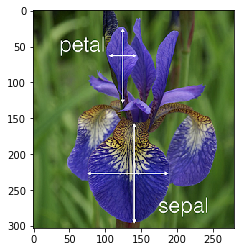

In [30]:
plt.imshow(f)

No trecho a seguir, é colocado um círculo binário no canal Alfa: um na parte central e zero na parte externa.

In [31]:
H,W = f.shape[:2]
r,c = np.indices((H,W))

In [32]:
f[:,:,3]= (r - H/2)**2 + (c - W/2)**2 < 140**2

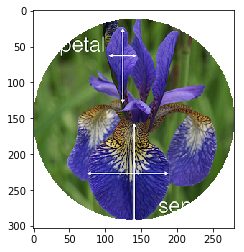

In [33]:
plt.imshow(f)